# K Means Clustering Algorithm

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping groups (or clusters). The algorithm identifies `𝑘` number of centroids, and then allocates every data point to the nearest cluster, keeping the centroids as small as possible.

### How K-means Clustering Works

1. **Initialization**: Choose \( k \) initial cluster centroids randomly from the dataset. 

2. **Assignment**: Assign each data point to the nearest centroid. This forms \( k \) clusters.

3. **Update**: Calculate the new centroids as the mean of all data points assigned to each cluster.

4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or a maximum number of iterations is reached.


### Applications of K-means Clustering

- **Market Segmentation**: Grouping customers based on purchasing behavior.
- **Document Clustering**: Organizing documents into topics.
- **Image Compression**: Reducing the number of colors in an image.
- **Anomaly Detection**: Identifying unusual patterns in data.


**Importing Important Library**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


%matplotlib inline

#### Using make_blob dataset

Reading the data

In [8]:
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.60, random_state=32, n_features=2)


Plotting Data to visualize

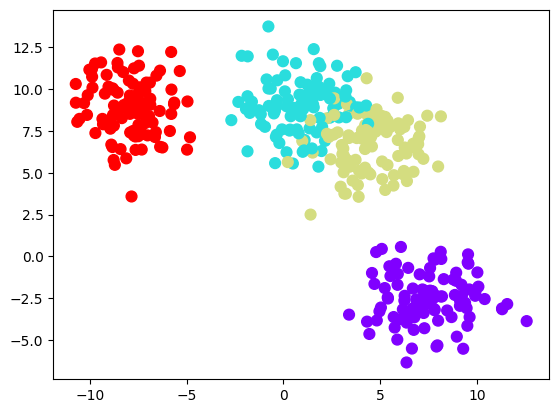

In [14]:
plt.scatter(X[:, 0], X[:, 1],c=y,s=60,cmap="rainbow")
plt.show()

#### Create and fit model

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

kmeans cluster center

In [18]:
centers=kmeans.cluster_centers_
centers

kmeans labels

In [19]:
labels=kmeans.labels_
labels

The above labels represents where the record belongs to. The first record belongs to cluster 3 and second record belongs to cluster 1 and so on.

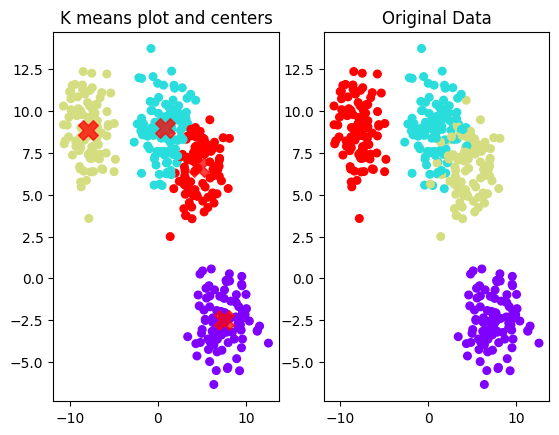

In [24]:
plt.subplot(1,2,1)
plt.title("K means plot and centers")
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.subplot(1,2,2)
plt.title("Original Data")
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow')
plt.show()

In the above graphs color have no such meaning they are used to represent only cluster.

c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

Text(0, 0.5, 'Sum of Squared Error')

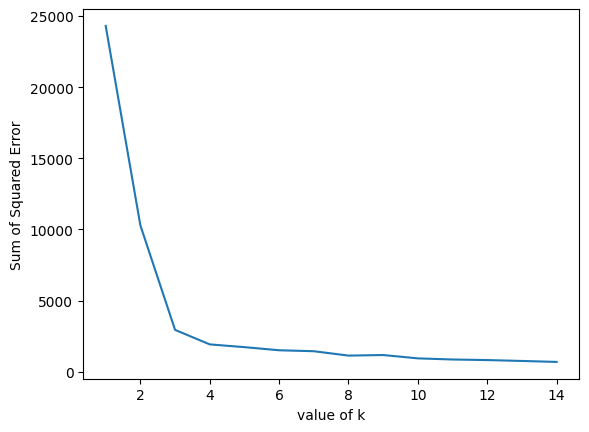

In [45]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)# km.inetria will give you the value of sum of square error

sse

plt.plot(k_rng,sse)
plt.xlabel("value of k")
plt.ylabel("Sum of Squared Error")

We can see k =4 gives quite the optimal solution.

## Using our own csv file to make cluster

**Reading CSV File**

In [25]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**Visualizing the Cluster in Data**

Text(0, 0.5, 'Income ($)')

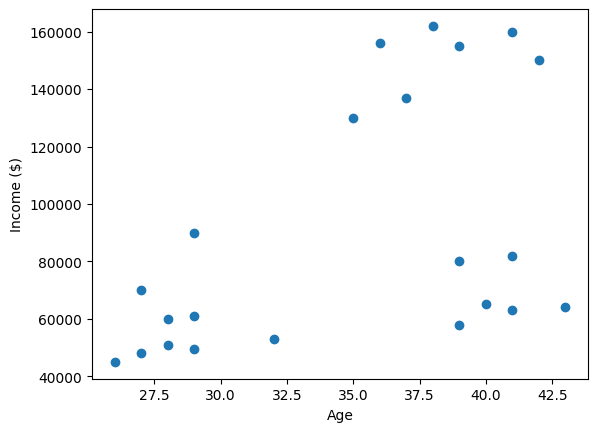

In [26]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income ($)")

* By visual Inspection we can see there are mainly 3 clusters present in data

In [28]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

**Fit and Predict the Data**

In [30]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

**Adding the Predicted Data as Column in our Orignal DataFrame**

In [31]:
df["Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


**Visualizing the Cluster in Data with Different Cluster Value**

Text(0, 0.5, 'Income($)')

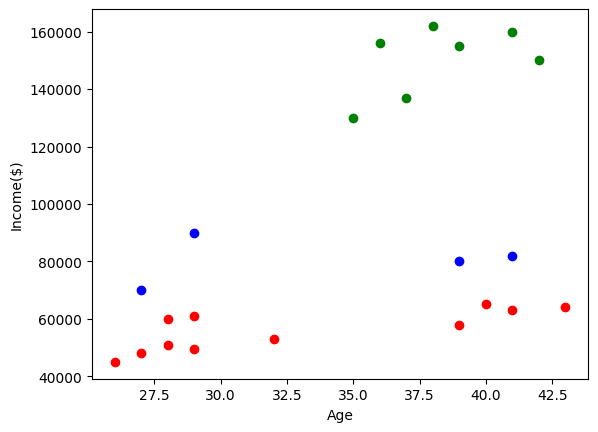

In [11]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")

plt.xlabel("Age")
plt.ylabel("Income($)")

We can see clustering is not so perfecct so the potential problem can be because of huge income value.

**Importing MinMaxScaler Method**

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

**Transforming Income Column to Scale of 0 to 1**

In [34]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


**Transforming Age Column to Scale of 0 to 1**

In [35]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


**Fit and Predict the Data**

In [36]:
km = KMeans(n_clusters=3)

In [37]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

**Adding the Predicted Data as Another Column in our Orignal DataFrame**

In [38]:
df["New Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster,New Cluster
0,Rob,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


**Visualizing the Cluster in New Data with Different Cluster Value**

Text(0, 0.5, 'Income($)')

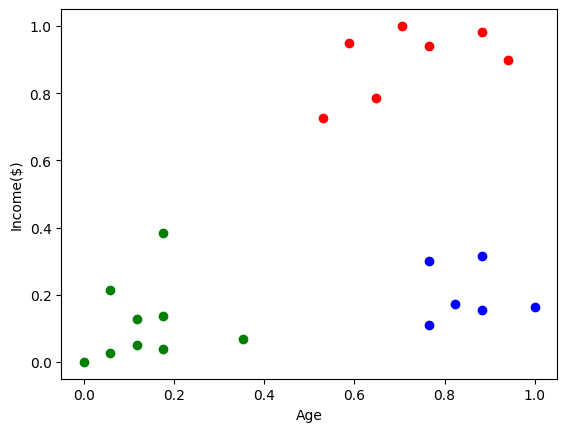

In [39]:
df1 = df[df["New Cluster"]==0]
df2 = df[df["New Cluster"]==1]
df3 = df[df["New Cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")

plt.xlabel("Age")
plt.ylabel("Income($)")

We can see how the clustering changed and the result seems quite ok.

**Determinig the Cluster Center**

In [40]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

**Visualizing the Cluster in New Data with Different Cluster Value and Cluster Center**

Text(0, 0.5, 'Income($)')

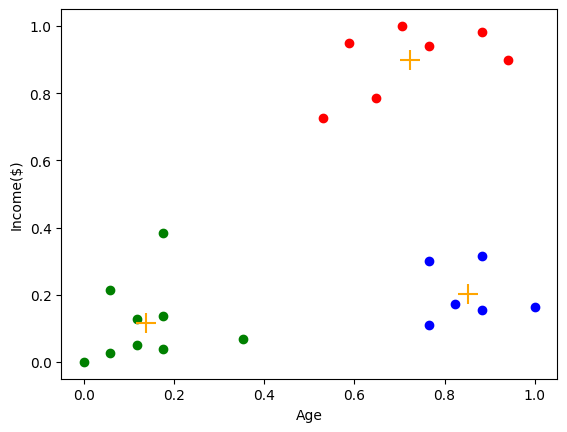

In [42]:
df1 = df[df["New Cluster"]==0]
df2 = df[df["New Cluster"]==1]
df3 = df[df["New Cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker="X",s=200)

plt.xlabel("Age")
plt.ylabel("Income($)")

**Finding the Sum of Squared Error**

In [43]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)# km.inetria will give you the value of sum of square error

sse

c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\prabigya\miniconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1446: 

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.2798062931046179,
 0.2712041177596832,
 0.17681044133887713,
 0.17556857356823352,
 0.11304517838728054,
 0.08510915216361345,
 0.07268915793189003,
 0.06167706637385459,
 0.03913672635392093,
 0.04072397136825017]

**Visualizing the SSE with Elbow Plot**

Text(0, 0.5, 'Sum of Squared Error')

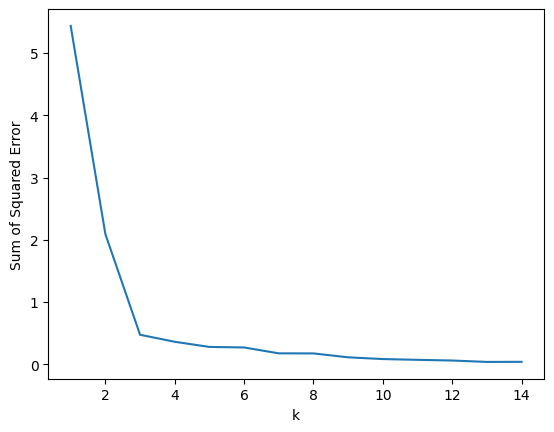

In [44]:
plt.plot(k_rng,sse)
plt.xlabel("value of k")
plt.ylabel("Sum of Squared Error")

**Here is our Elbow Plot with Elbow at K=3 which is our Orignal value of K**